**1. DATA COLLECTION**


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2. UNDERSTANDING THE DATASET**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill --> X input
tip --> Y output

**3. STATS**

In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**4. RELATIONSHIP CHECK**
Befor using any model, we must confirm relationship..?

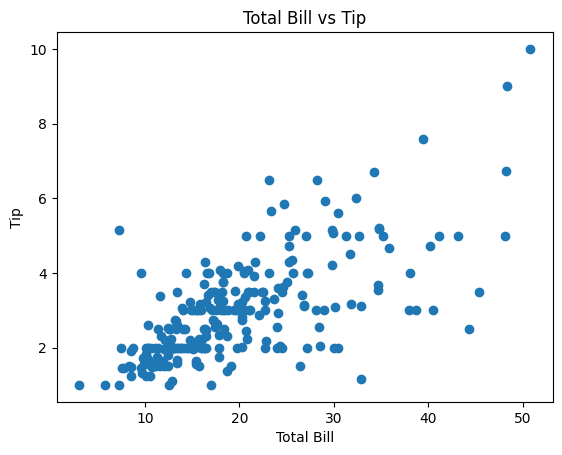

In [4]:
plt.scatter(df["total_bill"], df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

**OBSERVATION**
1. As the bill increases tip increases
2. Relationship = Straight line (we can use linear regression)

**5. FEATURE AND TARGET SEPARATION**

In [5]:
x=df[["total_bill"]] #used two [] to make it as 2D since feature i/p should be 2D
y=df["tip"]  #used single [] to make it as 1D since feature o/p should be 1D


**6. TRAIN-TEST-SPLIT**
 why..? --> A model must perform well on the unseen data, hence we divide the data into train and test sets.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)


test_size=0.2 --> means testing data is 20% that means training data is 80%
random_state=42 -->out of the 80% it will take random 42 values to train and 42 values to test

**7. FEATURE STANDARDIZATION**
    why..?
1. compare the coefficients fairly
2. avoid the dominance of large values
3. prepare for ridge ans lasso

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**NOTE:** 
1. Fit_transform only on training data
2. Prevents the data leakage

**8. TRAIN LINEAR REGRESSION MODEL**

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient (m):",model.coef_[0])
print("Intercept (c):",model.intercept_)

Co-efficient (m): 0.9357171400271826
Intercept (c): 3.0877948717948724


In [9]:
y_pred=model.predict(x_test_scaled)

**9. MODEL EVALUATION METRICS**

In [10]:
from sklearn.metrics import r2_score #accuracy
r2=r2_score(y_test,y_pred)
print("R2_score:",r2)

R2_score: 0.5449381659234664


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 0.5688142529229538
Root Mean Squared Error: 0.7541977545199626


In [12]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test,y_pred)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.7541977545199626


**10.VISUALIZE THE BEST FIT LINE**

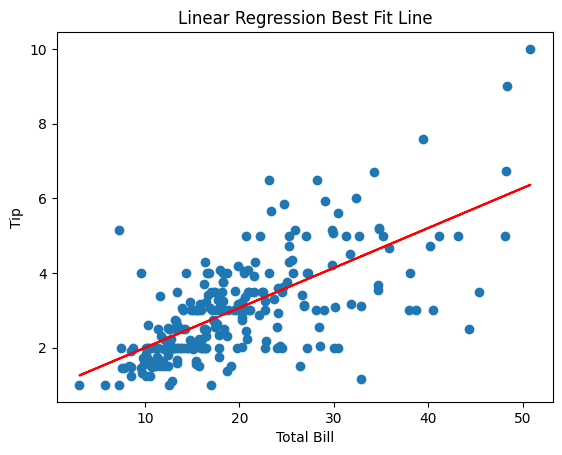

In [13]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color='red')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression Best Fit Line")
plt.show()

**11. INPUT - OUTPUT REAT TIME**

In [17]:
bill_amount=float(input("Enter the bill amount: "))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"Predicted tip amount for a bill of {bill_amount} is {predict_tip[0]:.2f}")

Predicted tip amount for a bill of 3200.0 is 343.21


c:\Users\spoor\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
